Dataset: Indicators of Anxiety or Depression Based on Reported Frequency of Symptoms During Last 7 Days

Website: data.world 

Link to Dataset:

https://data.world/us-hhs-gov/20390186-e507-434c-a129-56f021447e3b/workspace/file?filename=csv-1.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import plotly as py
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from statsmodels.graphics.regressionplots import abline_plot
import numpy as np
from statsmodels.graphics.regressionplots import abline_plot
from sklearn.linear_model import LinearRegression

**Importing csv file and first 5 rows**

In [2]:
df = pd.read_csv("csv-1.csv")
df.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN


**Column Names**

In [3]:
dfcol = df.columns

for name in dfcol:
    print(name)

Indicator
Group
State
Subgroup
Week
Week Label
Value
Low CI
High CI
Confidence Interval
Quartile range


**Meanings for each column/variable**:

- *Indicator*: labeled disorder; 

- *Group*: type of group

    - National Estimate (data for the entire country)

    - By Age
   
    - By Gender

    - By Race/Hispanic ethnicity

    - By Education
    
    - By State

- *State*: full state name in the United States including "United States" and "District of Columbia"

- *Subgroup*: type of subgroup within a certain group (see **Subgroup** heading for full list)

- *Week*: numeric value indicating which week # it is; total of 7 observed weeks

- *Week Label*: date (month and day) for a certain week

    - Week 1: Apr 23 - May 5
    
    - Week 2: May 7 - May 12
    
    - Week 3: May 14 - May 19
    
    - Week 4: May 21 - May 26
    
    - Week 5: May 28 - June 2
    
    - Week 6: June 4 - June 9
    
    - Week 7: June 11 - June 16

- *Value*: value indicating the likelihood of a disorder; higher values mean higher correspondence

- *Low CI*: lowerbound of the confidence interval

- *High CI*: upperbound of the confidence interval

- *Confidence Interval*: the full range of the confidence interval

- *Quartile range*: quartile range shown as an interval (?)

**Week Label**

In [4]:
weeks = pd.unique(df['Week Label'])

for week in weeks:
    print(week)

Apr 23 - May 5
May 7 - May 12
May 14 - May 19
May 21 - May 26
May 28 - June 2
June 4 - June 9
June 11 - June 16


**States**

In [5]:
states = pd.unique(df['State'])

for state in states:
    print(state)

United States
Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
District of Columbia
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [6]:
# 2 additional states: United States and District of Columbia
print(len(states))

52


**Indicators**

In [7]:
indicators = pd.unique(df['Indicator'])

for ind in indicators:
    print(ind)

Symptoms of Depressive Disorder
Symptoms of Anxiety Disorder
Symptoms of Anxiety Disorder or Depressive Disorder


In [8]:
# 490 rows with symptoms of anxiety disorder
sum(df['Indicator'] == "Symptoms of Anxiety Disorder")

490

**Groups**

In [9]:
groups = pd.unique(df['Group'])

for group in groups:
    print(group)

National Estimate
By Age
By Gender
By Race/Hispanic ethnicity
By Education
By State


**Subgroups**

In [10]:
subgroups = pd.unique(df['Subgroup'])

for sub in subgroups:
    print(sub)

United States
18 - 29 years
30 - 39 years
40 - 49 years
50 - 59 years
60 - 69 years
70 - 79 years
80 years and above
Male
Female
Hispanic or Latino
Non-Hispanic white, single race
Non-Hispanic black, single race
Non-Hispanic Asian, single race
Non-Hispanic, other races and multiple races
Less than a high school diploma
High school diploma or GED
Some college/Associate's degree
Bachelor's degree or higher
Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
District of Columbia
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


**Gender Grouping for ANXIETY**

In [11]:
# mask for gender
mask = df["Group"] == "By Gender"
gender_df = df[mask]

# mask for anxiety disorder by gender
mask2 = gender_df["Indicator"] == "Symptoms of Anxiety Disorder"
anx_gen_df = gender_df[mask2]

anx_gen_df.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
78,Symptoms of Anxiety Disorder,By Gender,United States,Male,1,Apr 23 - May 5,26.1,24.7,27.5,24.7 - 27.5,NaN
79,Symptoms of Anxiety Disorder,By Gender,United States,Female,1,Apr 23 - May 5,35.4,34.5,36.3,34.5 - 36.3,NaN
288,Symptoms of Anxiety Disorder,By Gender,United States,Male,2,May 7 - May 12,26.7,24.9,28.5,24.9 - 28.5,NaN
289,Symptoms of Anxiety Disorder,By Gender,United States,Female,2,May 7 - May 12,33.1,32.0,34.2,32.0 - 34.2,NaN
498,Symptoms of Anxiety Disorder,By Gender,United States,Male,3,May 14 - May 19,24.2,23.2,25.2,23.2 - 25.2,NaN


**Male Anxiety**

In [12]:
m_mask = anx_gen_df["Subgroup"] == "Male"
m_anx_gen_df = anx_gen_df[m_mask]

m_anx_gen_df.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
78,Symptoms of Anxiety Disorder,By Gender,United States,Male,1,Apr 23 - May 5,26.1,24.7,27.5,24.7 - 27.5,NaN
288,Symptoms of Anxiety Disorder,By Gender,United States,Male,2,May 7 - May 12,26.7,24.9,28.5,24.9 - 28.5,NaN
498,Symptoms of Anxiety Disorder,By Gender,United States,Male,3,May 14 - May 19,24.2,23.2,25.2,23.2 - 25.2,NaN
708,Symptoms of Anxiety Disorder,By Gender,United States,Male,4,May 21 - May 26,25.4,24.4,26.3,24.4 - 26.3,NaN
918,Symptoms of Anxiety Disorder,By Gender,United States,Male,5,May 28 - June 2,26.0,25.1,26.8,25.1 - 26.8,NaN


In [13]:
m_anx_gen_df.describe()

,Week,Value,Low CI,High CI
count,7.000000,7.000000,7.000000,7.000000
mean,4.000000,26.185714,24.957143,27.428571
std,2.160247,1.218508,1.144344,1.427952
min,1.000000,24.200000,23.200000,25.200000
25%,2.500000,25.700000,24.550000,26.550000
50%,4.000000,26.100000,24.900000,27.500000
75%,5.500000,26.750000,25.250000,28.450000
max,7.000000,28.100000,27.000000,29.300000


Notes:

- For *Value* for male, the mean is **26.185714** and the standard deviation is **1.218508**.

**Female Anxiety**

In [14]:
f_mask = anx_gen_df["Subgroup"] == "Female"
f_anx_gen_df = anx_gen_df[f_mask]

f_anx_gen_df.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
79,Symptoms of Anxiety Disorder,By Gender,United States,Female,1,Apr 23 - May 5,35.4,34.5,36.3,34.5 - 36.3,NaN
289,Symptoms of Anxiety Disorder,By Gender,United States,Female,2,May 7 - May 12,33.1,32.0,34.2,32.0 - 34.2,NaN
499,Symptoms of Anxiety Disorder,By Gender,United States,Female,3,May 14 - May 19,32.1,31.0,33.1,31.0 - 33.1,NaN
709,Symptoms of Anxiety Disorder,By Gender,United States,Female,4,May 21 - May 26,33.2,32.3,34.2,32.3 - 34.2,NaN
919,Symptoms of Anxiety Disorder,By Gender,United States,Female,5,May 28 - June 2,35.0,34.3,35.8,34.3 - 35.8,NaN


In [15]:
f_anx_gen_df.describe()

,Week,Value,Low CI,High CI
count,7.000000,7.000000,7.000000,7.000
mean,4.000000,34.128571,33.185714,35.100
std,2.160247,1.298351,1.390957,1.249
min,1.000000,32.100000,31.000000,33.100
25%,2.500000,33.150000,32.150000,34.200
50%,4.000000,35.000000,34.100000,35.800
75%,5.500000,35.050000,34.200000,36.050
max,7.000000,35.400000,34.500000,36.300


Notes:

- For *Value* for female, the mean is **34.128571** and the standard deviation is **1.298351**.

**HYPOTHESIS TESTING (2-sided)**

$$H_0: \mu_1 = \mu_2$$

$$H_1: \mu_1 \neq \mu_2$$

where group 1 is *Male* and group 2 is *Female*.

We are testing a two-sided alternative hypothesis test to see if the **mean** *Value* is different.

Suppose we use a significance level of 5% or $\alpha = 0.05$.

In [16]:
m_value = m_anx_gen_df[["Value"]]
f_value = f_anx_gen_df[["Value"]]

# perform 2-sided t-test
stats.ttest_ind(m_value, f_value, 
                equal_var = False)

Ttest_indResult(statistic=array([-11.80221504]), pvalue=array([6.05918604e-08]))

In [17]:
stats.ttest_ind(m_value, f_value, 
                equal_var = False).pvalue[0]

6.059186037314622e-08

We see that the p-value for our t-test is about $6.0592 x 10^{-8}$. Since this value is less than our significance level of $\alpha = 0.05$, we can **reject** the null hypothesis. There is enough evidence to conclude that **there is a difference of means of the value score between males and females**.

Given the mean values for male and female, it seems that the mean value for females is larger, so it may help to look into conducting a one-sided t-test.

**HYPOTHESIS TESTING (1-sided)**

$$H_0: \mu_1 = \mu_2$$

$$H_1: \mu_1 < \mu_2$$

where group 1 is *Male* and group 2 is *Female*.

We are testing a one-sided alternative hypothesis test to see if the **mean** *Value* for males is less than that of females.

Suppose we use a significance level of 5% or $\alpha = 0.05$.

In [18]:
# perform one-sided t-test
stats.ttest_ind(m_value, f_value, 
                alternative = 'less', 
                equal_var = False)

Ttest_indResult(statistic=array([-11.80221504]), pvalue=array([3.02959302e-08]))

In [19]:
stats.ttest_ind(m_value, f_value, 
                alternative = 'less', 
                equal_var = False).pvalue[0]

3.029593018657311e-08

**Conclusion**

We see that the p-value for our t-test is about $3.0296 x 10^{-8}$. Since this value is less than our significance level of $\alpha = 0.05$, we can **reject** the null hypothesis. There is enough evidence to conclude that **males have a smaller mean value than females regarding indicating anxiety**.

In other words, it seems that females on average have a higher mean value for having anxiety.

Other Notes:
- States has 52 total values; two of those values are "United States" and "District of Columbia"

- "quartile_range" has missing values

- 490 rows with "Symptoms of Anxiety Disorder"

- Score for ranking (Average); higher value = higher correspondence

**Visualization of Gender Difference**

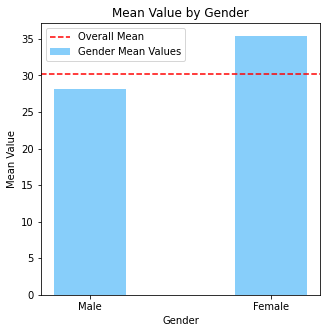

In [20]:
fig = plt.figure(figsize = (5, 5))

plt.bar(anx_gen_df["Subgroup"], 
        anx_gen_df["Value"], 
       width = 0.4,
       color = "lightskyblue",
       label = "Gender Mean Values")

plt.xlabel("Gender")

plt.ylabel("Mean Value")

plt.title("Mean Value by Gender")

plt.axhline(y = np.mean(anx_gen_df["Value"]),
           color = "r",
           linestyle = "--",
           label = "Overall Mean")

plt.legend()

**Model**

In [21]:
model = ols('Value ~ C(Subgroup)', 
            data = anx_gen_df).fit()

sm.stats.anova_lm(model, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
C(Subgroup),1.0,220.811429,220.811429,139.29228,5.818425e-08
Residual,12.0,19.022857,1.585238,NaN,NaN


In [22]:
model.summary()

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     139.3
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           5.82e-08
Time:                        22:09:59   Log-Likelihood:                -22.011
No. Observations:                  14   AIC:                             48.02
Df Residuals:                      12   BIC:                             49.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              34.1286      0.476     71.717      0.000      33.092      35.165
C(Subgroup)[T.Male]    -7.9429      0.673    -11.802      0.000      -9.409      -6.477
==============================================================================
Omnibus:                        0.855   Durbin-Watson:                   0.584
Prob(Omnibus):                  0.652   Jarque-Bera (JB):                0.750
Skew:                          -0.310   Prob(JB):                        0.687
Kurtosis:                       2.051   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model.pvalues

Intercept              3.591882e-17
C(Subgroup)[T.Male]    5.818425e-08
dtype: float64

Text(0.5, 0.98, 'Plot of Dummy Variables')

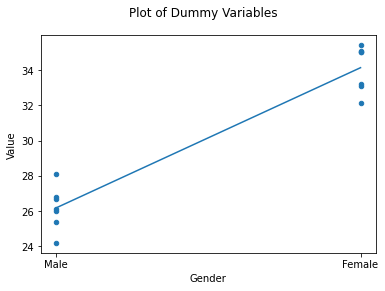

In [24]:
ax = anx_gen_df.plot(x = 'Subgroup',
                      y = 'Value', 
                      kind = 'scatter')

plt.xlabel("Gender")


# left to right
x = [0, 1]

y = [34.1286 - 7.9429, 34.1286]

plt.plot(x, y)

plt.suptitle("Plot of Dummy Variables")

Text(0, 0.5, 'Gender')

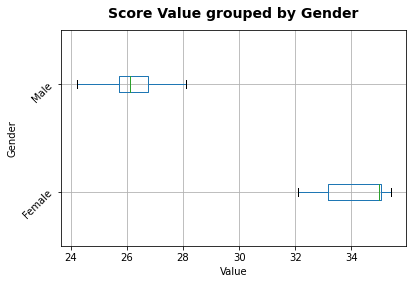

In [26]:
anx_gen_df.boxplot(column = "Value",
                    by = "Subgroup",
                   vert = False)

plt.yticks(rotation = 45)

plt.suptitle('Score Value grouped by Gender', fontsize=14, fontweight='bold')
plt.title("")
plt.xlabel("Value")
plt.ylabel("Gender")